 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [217]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [222]:
# Reading whale returns & set index
whale_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col='Date', infer_datetime_format=True, parse_dates=True)

#Sort index
whale_df = whale_df.sort_index()
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [219]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [220]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns
Read the algorithmic daily returns and clean the data

In [221]:
# Reading algorithmic returns & set index
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col='Date', infer_datetime_format=True, parse_dates=True)

#Sort index
algo_df = algo_df.sort_index()
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [223]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [234]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [239]:
# Reading S&P 500 Closing Prices & set index
sp500_path = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_df = sp500_df.sort_index()
sp500_df

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [240]:
# Check nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [241]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [242]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.dtypes

Close    float64
dtype: object

In [243]:
# Calculate Daily Returns
# Drop nulls
daily_returns = sp500_df.pct_change().dropna()
daily_returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [244]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns.columns = ['Returns S&P 500'] 
daily_returns

,Returns S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [246]:
# Check index data types
print(f"Whale: {type(whale_df.index)} Algo: {type(algo_df.index)} Daily: {type(daily_returns.index)}")

# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# Set Date columns as index
combined_returns = pd.concat([algo_df, whale_df, daily_returns], axis="columns", join="inner")
combined_returns.loc['2015-11-23':'2015-11-25']

Whale: <class 'pandas.core.indexes.datetimes.DatetimeIndex'> Algo: <class 'pandas.core.indexes.datetimes.DatetimeIndex'> Daily: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Returns S&P 500
Date,,,,,,,
2015-11-23,0.012757,0.002214,-0.001089,-0.003781,0.003151,0.012117,-0.001235
2015-11-24,0.041067,0.007598,0.003382,0.006359,0.003376,-0.006365,0.001222
2015-11-25,-0.000418,0.004740,0.002190,0.004682,0.001628,0.000008,-0.000129


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Portfolio daily returns'}, xlabel='Date'>

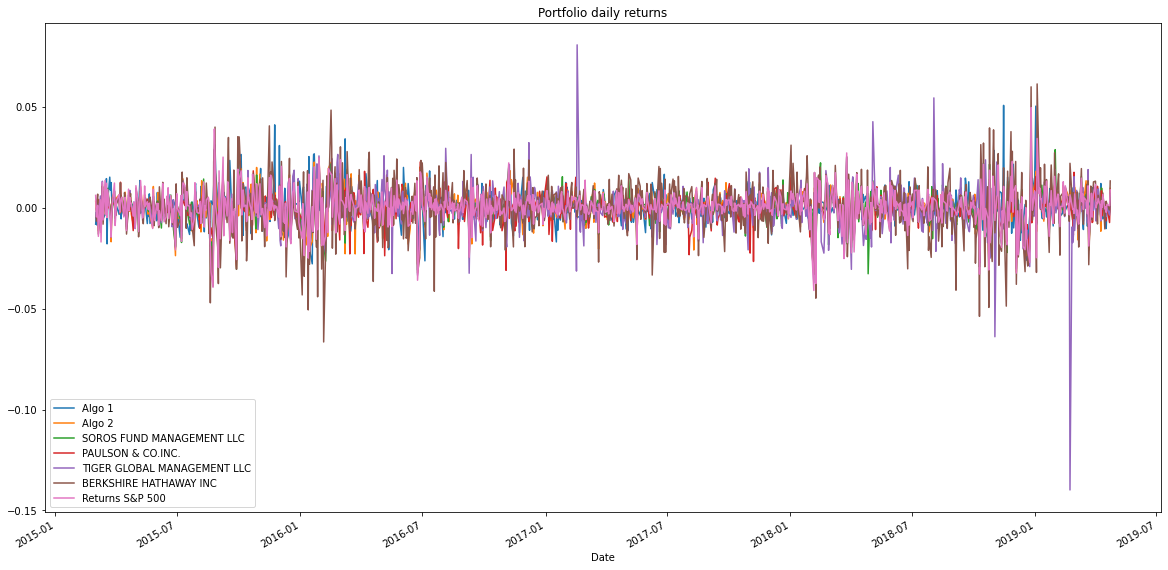

In [269]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(20,10), title='Portfolio daily returns')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative returns'}, xlabel='Date'>

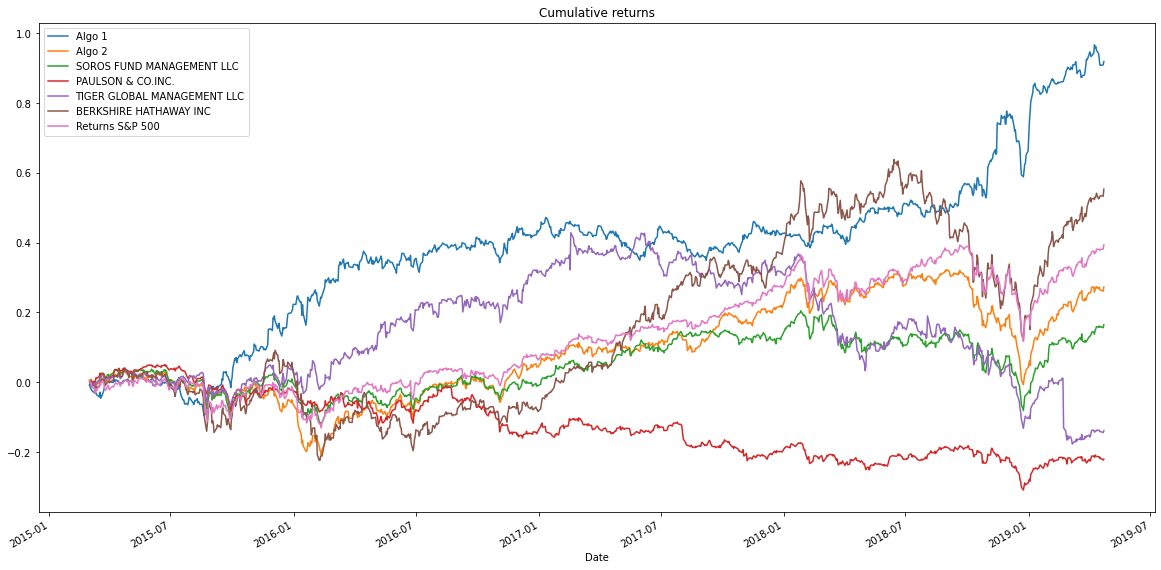

In [270]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + combined_returns).cumprod(skipna=True) - 1

# Plot cumulative returns
cum_returns.plot(figsize=(20,10), title='Cumulative returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

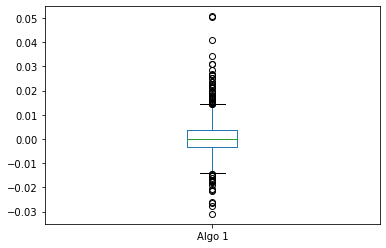

In [249]:
# Box plot to visually show risk
combined_returns['Algo 1'].plot.box()

<AxesSubplot:>

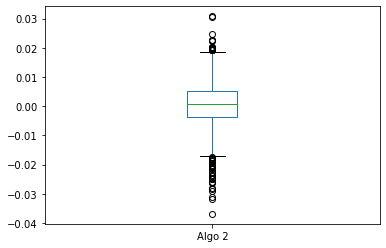

In [250]:
combined_returns['Algo 2'].plot.box()

<AxesSubplot:>

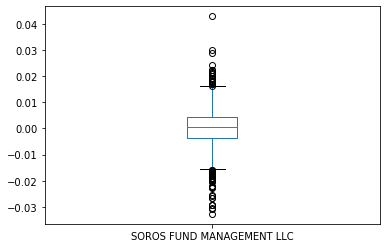

In [251]:
combined_returns['SOROS FUND MANAGEMENT LLC'].plot.box()

<AxesSubplot:>

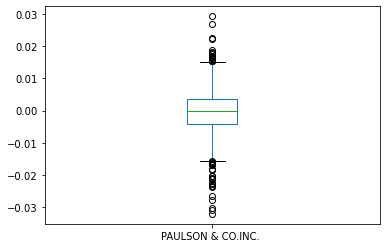

In [252]:
combined_returns['PAULSON & CO.INC. '].plot.box()

<AxesSubplot:>

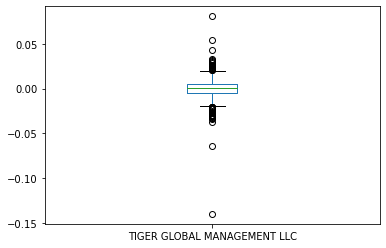

In [253]:
combined_returns['TIGER GLOBAL MANAGEMENT LLC'].plot.box()

<AxesSubplot:>

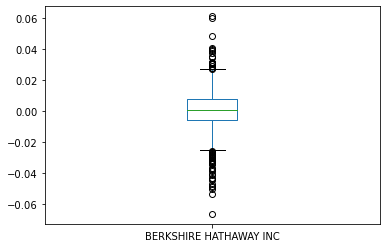

In [254]:
combined_returns['BERKSHIRE HATHAWAY INC'].plot.box()

<AxesSubplot:>

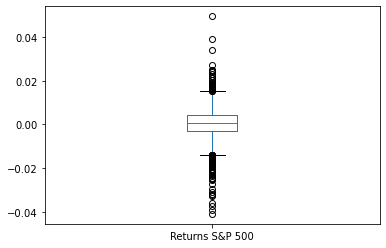

In [255]:
combined_returns['Returns S&P 500'].plot.box()

### Calculate Standard Deviations

In [257]:
# Calculate the daily standard deviations of all portfolios
portf_std = combined_returns.std()
portf_std

Algo 1                         0.007621
Algo 2                         0.008339
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Returns S&P 500                0.008551
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [258]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
risky_portf = list()

for key, value in portf_std.items():
    if value > portf_std['Returns S&P 500']:
        risky_portf.append(key)

print(risky_portf)

['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']


### Calculate the Annualized Standard Deviation

In [259]:
# Calculate the annualized standard deviation (252 trading days)
annual_portf_std = portf_std * np.sqrt(252)
annual_portf_std

Algo 1                         0.120987
Algo 2                         0.132374
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Returns S&P 500                0.135751
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-day STDs'}, xlabel='Date'>

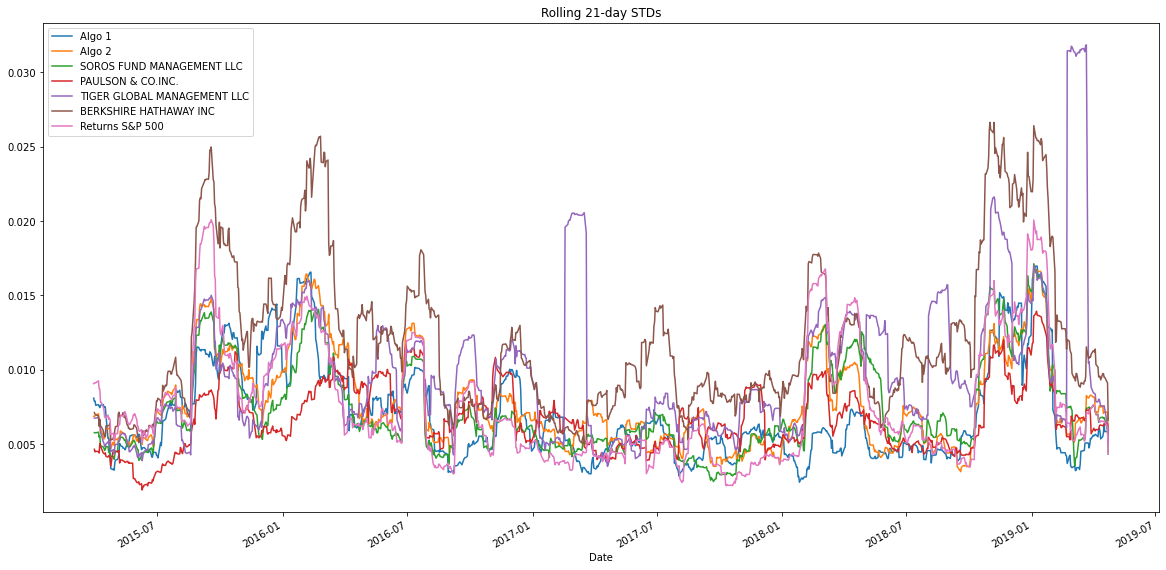

In [260]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_returns_rolling_std = combined_returns.rolling(window=21).std()

# Plot the rolling standard deviation
combined_returns_rolling_std.plot(figsize=(20,10), title='Rolling 21-day STDs')

### Calculate and plot the correlation

<AxesSubplot:>

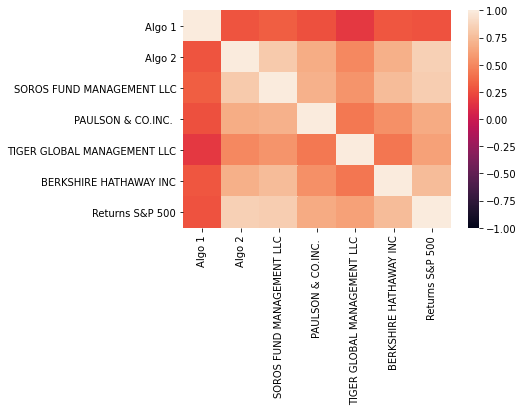

In [261]:
# Calculate the correlation between daily returns of portfolios
correlation = combined_returns.corr()

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60 day beta Algo 1'}, xlabel='Date'>

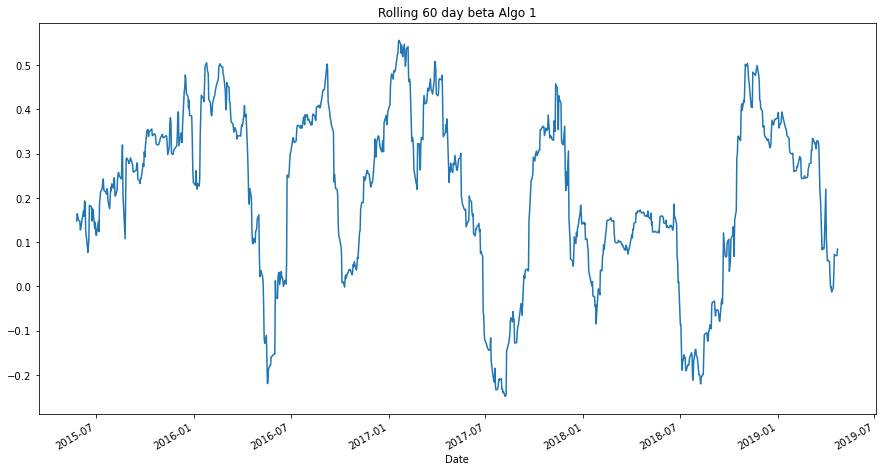

In [263]:
# Calculate covariance of a single portfolio
rolling_cov = combined_returns['Algo 1'].rolling(window=60).cov(combined_returns['Returns S&P 500'])

# Calculate variance of S&P 500
rolling_var = combined_returns['Returns S&P 500'].rolling(window=60).var()

# Computing beta
rolling_beta = rolling_cov / rolling_var

# Plot beta trend
rolling_beta.plot(title='Rolling 60 day beta Algo 1', figsize=(15,8))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [264]:
# Use `ewm` to calculate the rolling window
ewm_times = combined_returns.index
ewm_returns = combined_returns.ewm(halflife='21 days', times=pd.DatetimeIndex(ewm_times)).mean()
ewm_returns

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Returns S&P 500
Date,,,,,,,
2015-03-02,-0.008158,0.003200,NaN,NaN,NaN,NaN,0.006125
2015-03-03,-0.004999,0.001091,-0.001266,-0.004981,-0.000496,-0.006569,0.000705
2015-03-04,-0.006235,0.001547,0.000511,-0.000802,-0.001532,-0.001089,-0.001049
2015-03-05,-0.004849,0.002276,0.001718,0.000878,-0.000193,0.001603,-0.000460
2015-03-06,-0.004872,-0.000655,-0.000808,-0.000291,-0.002369,-0.002256,-0.003387
...,...,...,...,...,...,...,...
2019-04-16,0.000688,0.001437,0.001649,0.000489,-0.000374,0.001825,0.001489
2019-04-17,0.000186,0.001132,0.001441,0.000171,-0.000558,0.001889,0.001317
2019-04-18,0.000151,0.001025,0.001441,0.000218,-0.000507,0.001890,0.001329


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [265]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (portf_std * np.sqrt(252))
sharpe_ratios

Algo 1                         1.360829
Algo 2                         0.506929
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Returns S&P 500                0.658706
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

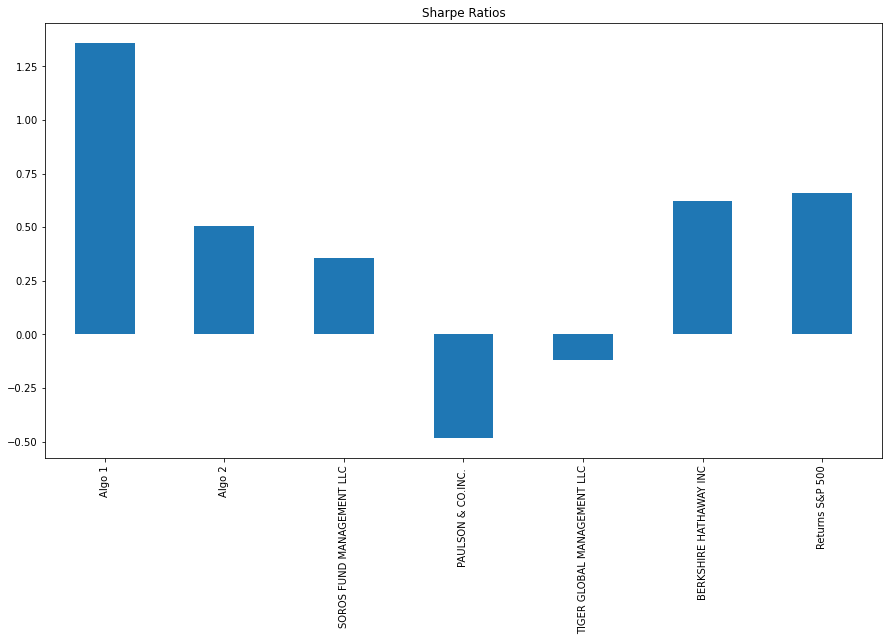

In [266]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios', figsize=(15,8))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 clearly outperforms both the whale and market index on a Sharpe ratio basis. Moreover, Algo 1 generates the highest absolute cumulative return. Algo 2 strategy is less compelling.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [280]:
# I have used Google Finance to import data for a custom Fintech portfolio: LC, SQ, PYPL
# Setting paths
lc_path = Path("Resources/LC.csv")
sq_path = Path("Resources/SQ.csv")
pypl_path = Path("Resources/PYPL.csv")

In [281]:
# Combine all stocks in a single DataFrame
# As the Date format of the Google Finance data is different from the portfolio in Part I, need to convert the data 
# column format before setting as index (I couldn't properly amend the data type of an index)

# Reading data from 1st stock
lc_df = pd.read_csv(lc_path)

# Convert Date column format and set as index
lc_df['Date'] = pd.to_datetime(lc_df['Date']).dt.date
lc_df.set_index('Date', inplace=True)
lc_df = lc_df.sort_index()

# Check for null values
lc_df.isnull().sum()

Close    0
dtype: int64

In [282]:
# Sample data
lc_df

,Close
Date,
2015-01-02,124.65
2015-01-05,120.00
2015-01-06,114.45
2015-01-07,114.40
2015-01-08,115.80
...,...
2021-01-12,11.02
2021-01-13,11.33
2021-01-14,11.25


In [283]:
# Reading data from 2nd stock
sq_df = pd.read_csv(sq_path)
sq_df['Date'] = pd.to_datetime(sq_df['Date']).dt.date
sq_df.set_index('Date', inplace=True)
sq_df = sq_df.sort_index()

# Check for null values
sq_df.isnull().sum()

Close    0
dtype: int64

In [284]:
# Sample data
sq_df

,Close
Date,
2015-11-19,13.07
2015-11-20,12.85
2015-11-23,12.12
2015-11-24,12.02
2015-11-25,11.90
...,...
2021-01-12,227.52
2021-01-13,230.92
2021-01-14,232.79


In [285]:
# Reading data from 3rd stock
pypl_df = pd.read_csv(pypl_path)
pypl_df['Date'] = pd.to_datetime(pypl_df['Date']).dt.date
pypl_df.set_index('Date', inplace=True)
pypl_df = pypl_df.sort_index()

# Check for null values
pypl_df.isnull().sum()

Close    0
dtype: int64

In [286]:
# Sample data
pypl_df

,Close
Date,
2015-07-06,36.71
2015-07-07,36.62
2015-07-08,34.70
2015-07-09,34.50
2015-07-10,34.69
...,...
2021-01-12,237.64
2021-01-13,244.90
2021-01-14,242.06


In [287]:
# Combine dataframes
custom_df = pd.concat([lc_df, sq_df, pypl_df], axis='columns', join='inner')
custom_df

,Close,Close,Close
Date,,,
2015-11-19,64.20,13.07,36.19
2015-11-20,63.15,12.85,36.36
2015-11-23,61.80,12.12,35.56
2015-11-24,61.00,12.02,35.12
2015-11-25,62.90,11.90,35.36
...,...,...,...
2021-01-12,11.02,227.52,237.64
2021-01-13,11.33,230.92,244.90
2021-01-14,11.25,232.79,242.06


In [288]:
# Reorganize portfolio data by having a column per symbol
custom_df.columns = ['LC', 'SQ', 'PYPL']
custom_df

,LC,SQ,PYPL
Date,,,
2015-11-19,64.20,13.07,36.19
2015-11-20,63.15,12.85,36.36
2015-11-23,61.80,12.12,35.56
2015-11-24,61.00,12.02,35.12
2015-11-25,62.90,11.90,35.36
...,...,...,...
2021-01-12,11.02,227.52,237.64
2021-01-13,11.33,230.92,244.90
2021-01-14,11.25,232.79,242.06


In [289]:
# Calculate daily returns
# Drop NAs
# Display sample data
custom_returns = custom_df.pct_change().dropna()
custom_returns

,LC,SQ,PYPL
Date,,,
2015-11-20,-0.016355,-0.016832,0.004697
2015-11-23,-0.021378,-0.056809,-0.022002
2015-11-24,-0.012945,-0.008251,-0.012373
2015-11-25,0.031148,-0.009983,0.006834
2015-11-27,-0.008744,0.012605,-0.005090
...,...,...,...
2021-01-12,0.006393,0.008958,0.000589
2021-01-13,0.028131,0.014944,0.030550
2021-01-14,-0.007061,0.008098,-0.011597


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [292]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portf_returns = custom_returns.dot(weights)

# Convert array into DataFrame with column name
portf_returns = pd.DataFrame(portf_returns, columns=['Custom']) 

# Display sample data
portf_returns

,Custom
Date,
2015-11-20,-0.009497
2015-11-23,-0.033396
2015-11-24,-0.011190
2015-11-25,0.009333
2015-11-27,-0.000410
...,...
2021-01-12,0.005313
2021-01-13,0.024542
2021-01-14,-0.003520


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [293]:
# Join your returns DataFrame to the original returns DataFrame
new_combined_returns = pd.concat([combined_returns, portf_returns], axis='columns', join='inner')
new_combined_returns

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Returns S&P 500,Custom
Date,,,,,,,,
2015-11-20,-0.000583,0.000913,0.005784,0.006760,0.003272,0.022681,0.003810,-0.009497
2015-11-23,0.012757,0.002214,-0.001089,-0.003781,0.003151,0.012117,-0.001235,-0.033396
2015-11-24,0.041067,0.007598,0.003382,0.006359,0.003376,-0.006365,0.001222,-0.011190
2015-11-25,-0.000418,0.004740,0.002190,0.004682,0.001628,0.000008,-0.000129,0.009333
2015-11-27,0.001387,0.003810,-0.000389,0.000004,0.001180,0.004219,0.000594,-0.000410
...,...,...,...,...,...,...,...,...
2019-04-16,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.000509,0.004357
2019-04-17,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,-0.002274,-0.006437
2019-04-18,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916,0.001579,-0.021826


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [294]:
# Calculate the annualized `std`
new_annual_std = new_combined_returns.std() * np.sqrt(252)
new_annual_std

Algo 1                         0.119186
Algo 2                         0.131413
SOROS FUND MANAGEMENT LLC      0.124896
PAULSON & CO.INC.              0.114686
TIGER GLOBAL MANAGEMENT LLC    0.181718
BERKSHIRE HATHAWAY INC         0.206202
Returns S&P 500                0.130799
Custom                         0.330985
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-day STDs'}, xlabel='Date'>

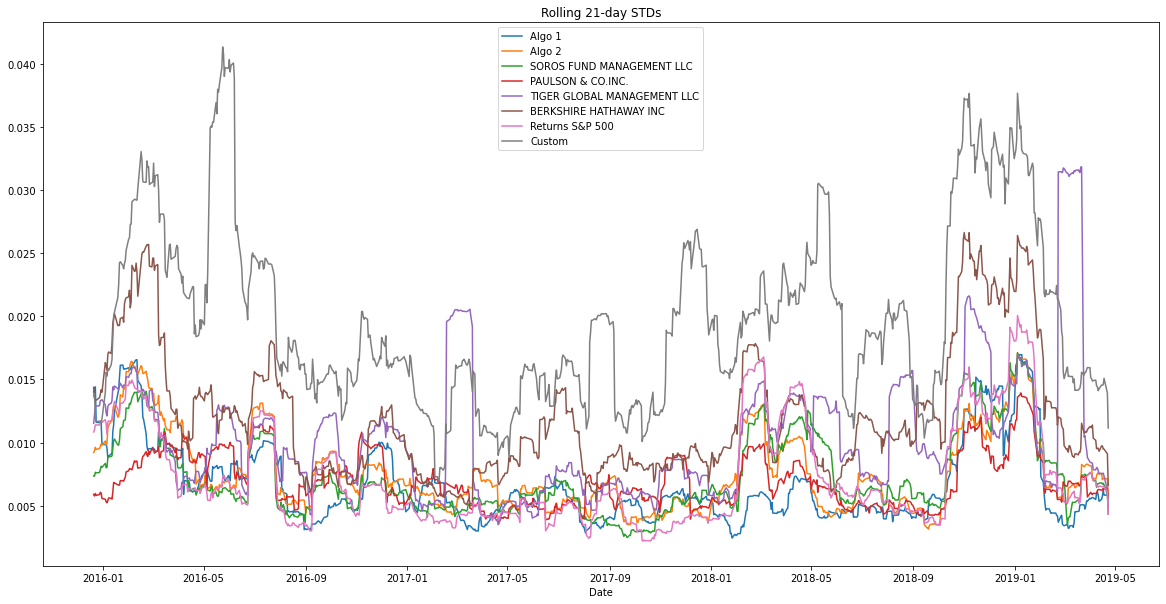

In [295]:
# Calculate rolling standard deviation
roll_std_new_portf = new_combined_returns.rolling(window=21).std()

# Plot rolling standard deviation
roll_std_new_portf.plot(figsize=(20,10), title='Rolling 21-day STDs')

### Calculate and plot the correlation

<AxesSubplot:>

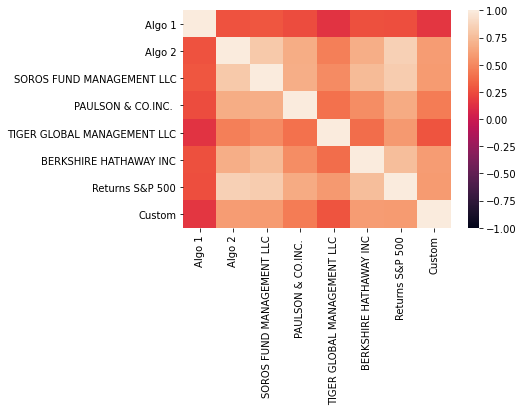

In [296]:
# Calculate and plot the correlation
new_correlation = new_combined_returns.corr()
sns.heatmap(new_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-day beta'}, xlabel='Date'>

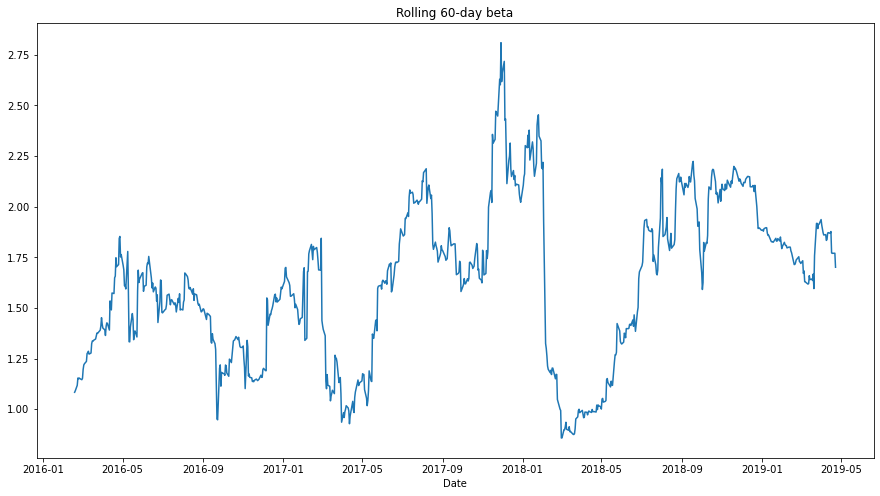

In [297]:
# Calculate and plot Beta
# Rolling covariance & variance
new_rolling_cov = new_combined_returns['Custom'].rolling(window=60).cov(new_combined_returns['Returns S&P 500'])
new_rolling_var = new_combined_returns['Returns S&P 500'].rolling(window=60).var()
new_rolling_beta = new_rolling_cov / new_rolling_var
new_rolling_beta.plot(figsize=(15,8), title="Rolling 60-day beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [298]:
# Calculate Annualzied Sharpe Ratios
new_annual_sharpe = (new_combined_returns.mean() * 252) / new_annual_std
new_annual_sharpe

Algo 1                         1.444522
Algo 2                         0.695618
SOROS FUND MANAGEMENT LLC      0.397592
PAULSON & CO.INC.             -0.501992
TIGER GLOBAL MANAGEMENT LLC   -0.206636
BERKSHIRE HATHAWAY INC         0.686875
Returns S&P 500                0.835592
Custom                         0.771913
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

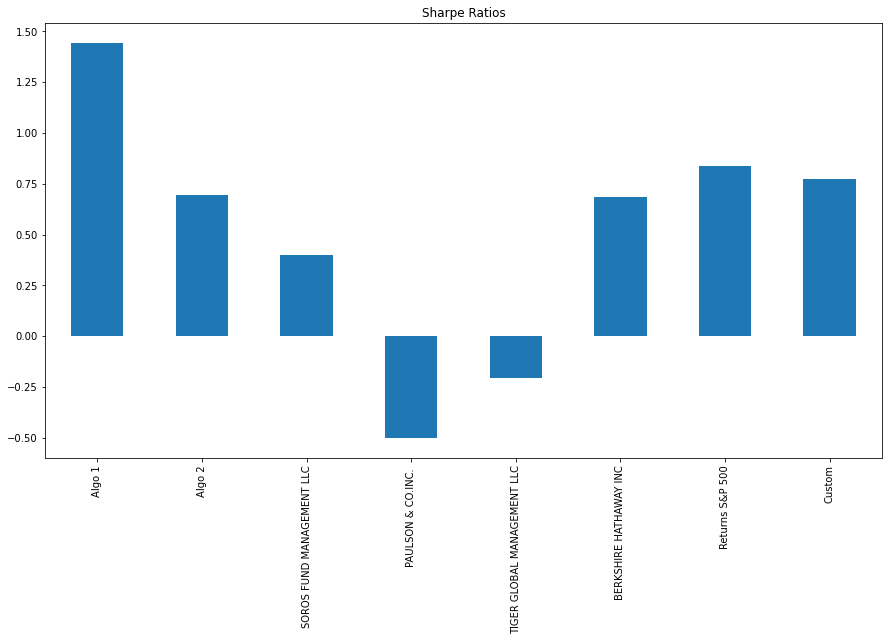

In [299]:
# Visualize the sharpe ratios as a bar plot
new_annual_sharpe.plot(kind='bar', title='Sharpe Ratios', figsize=(15,8))

### How does your portfolio do?

Write your answer here!

In [301]:
# My custom 'Fintech' portfolio has a similar Sharpe ratio to the S&P 500 index. Its Sharpe ratio outperforms most 
# other portfolios except the Algo 1 portfolio.